In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%load_ext autoreload
%autoreload 2
from irma_dataset import Irma

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
dataset = Irma(root="../../data/IRMA/irma-xray-dataset")
dataset.load()

In [10]:
dataset.df.head()

,image_id,irma_code,Path,Technical Code,Directional Code,Anatomical Code,Biological Code,Imaging Modality,Body Region
0,1877,1121-117-720-452,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,117,720,452,x-ray,abdomen
1,1879,1121-117-720-452,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,117,720,452,x-ray,abdomen
2,1880,1121-127-700-500,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,127,700,500,x-ray,abdomen
3,1882,1121-115-710-400,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,115,710,400,x-ray,abdomen
4,1883,1121-115-700-400,../../data/IRMA/irma-xray-dataset/ImageCLEFmed...,1121,115,700,400,x-ray,abdomen


In [11]:
dataset.df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12677 entries, 0 to 12676
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          12677 non-null  int64 
 1   irma_code         12677 non-null  object
 2   Path              12677 non-null  object
 3   Technical Code    12677 non-null  object
 4   Directional Code  12677 non-null  object
 5   Anatomical Code   12677 non-null  object
 6   Biological Code   12677 non-null  object
 7   Imaging Modality  12677 non-null  object
 8   Body Region       12677 non-null  object
dtypes: int64(1), object(8)
memory usage: 891.5+ KB


In [12]:
dataset.df.isnull().sum()

image_id            0
irma_code           0
Path                0
Technical Code      0
Directional Code    0
Anatomical Code     0
Biological Code     0
Imaging Modality    0
Body Region         0
dtype: int64

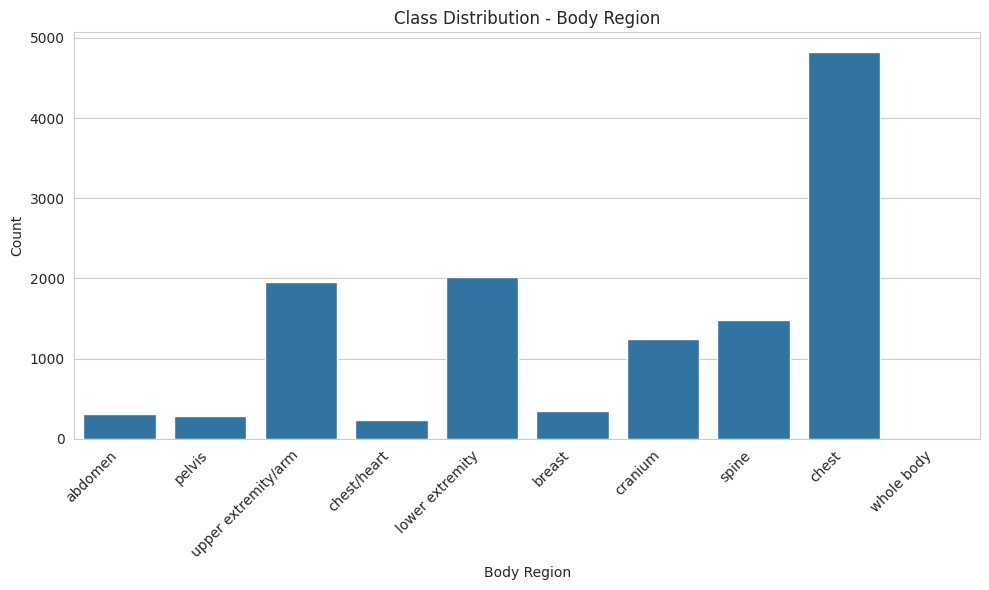

In [13]:
# Class distribution with rotated labels
plt.figure(figsize=(10, 6))
sns.countplot(x="Body Region", data=dataset.df)
plt.title("Class Distribution - Body Region")
plt.xlabel("Body Region")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

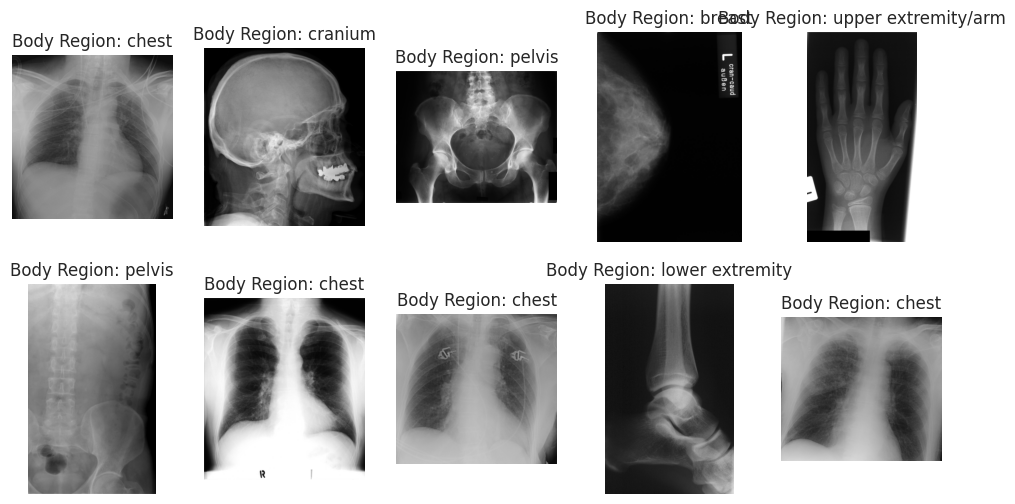

In [14]:
# Sample images
def show_sample_images(selection, num_samples=10):
    sample_images = selection.sample(num_samples)
    plt.figure(figsize=(12, 6))
    for i, (_, row) in enumerate(sample_images.iterrows(), 1):
        img = dataset.load_image(row["Path"])
        plt.subplot(2, int(num_samples/2), i)
        plt.imshow(img)
        plt.title(f"Body Region: {row['Body Region']}")
        plt.axis("off")
    plt.show()

show_sample_images(dataset.df)

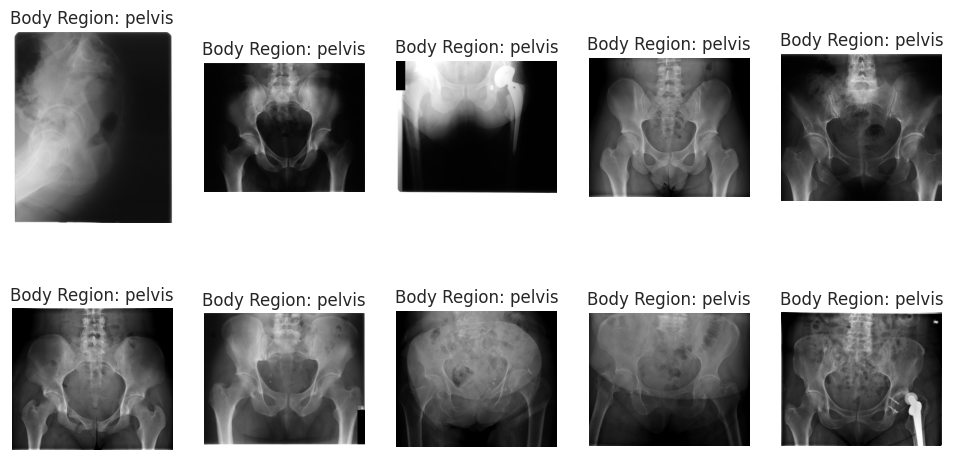

In [18]:
#body_region = "lower extremity"
#body_region = "breast"
body_region = "pelvis"

filtered_dataset = dataset.df[dataset.df["Body Region"] == body_region]

show_sample_images(filtered_dataset)